In [1]:
import math
import sys
sys.path.append('../../darknight/')
from fcts import array_in_nd_array, remove_space, r2pcorr,struc2mol
import numpy as np
import pandas as pd
import darkchem
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# Load training data
data = pd.read_excel('ketone_alcohol/ketone_alcohol_6C_train.xlsx')

In [3]:
# Remove the redundant space in the smiles string
data = remove_space(data)

../../darknight\fcts.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['Reactants'][i] = data['Reactants'][i].replace(' ','')
../../darknight\fcts.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['Products'][i] = data['Products'][i].replace(' ','')


In [4]:
# Transform the data type to DataFrame 
rdata_df = {'smiles': data['Reactants']}
rdata_df = pd.DataFrame(data = rdata_df)
pdata_df = {'smiles': data['Products']}
pdata_df = pd.DataFrame(data = pdata_df)

In [5]:
# Transform smiles strings to molecule structures
r_structure_df = struc2mol(rdata_df)
p_structure_df = struc2mol(pdata_df)

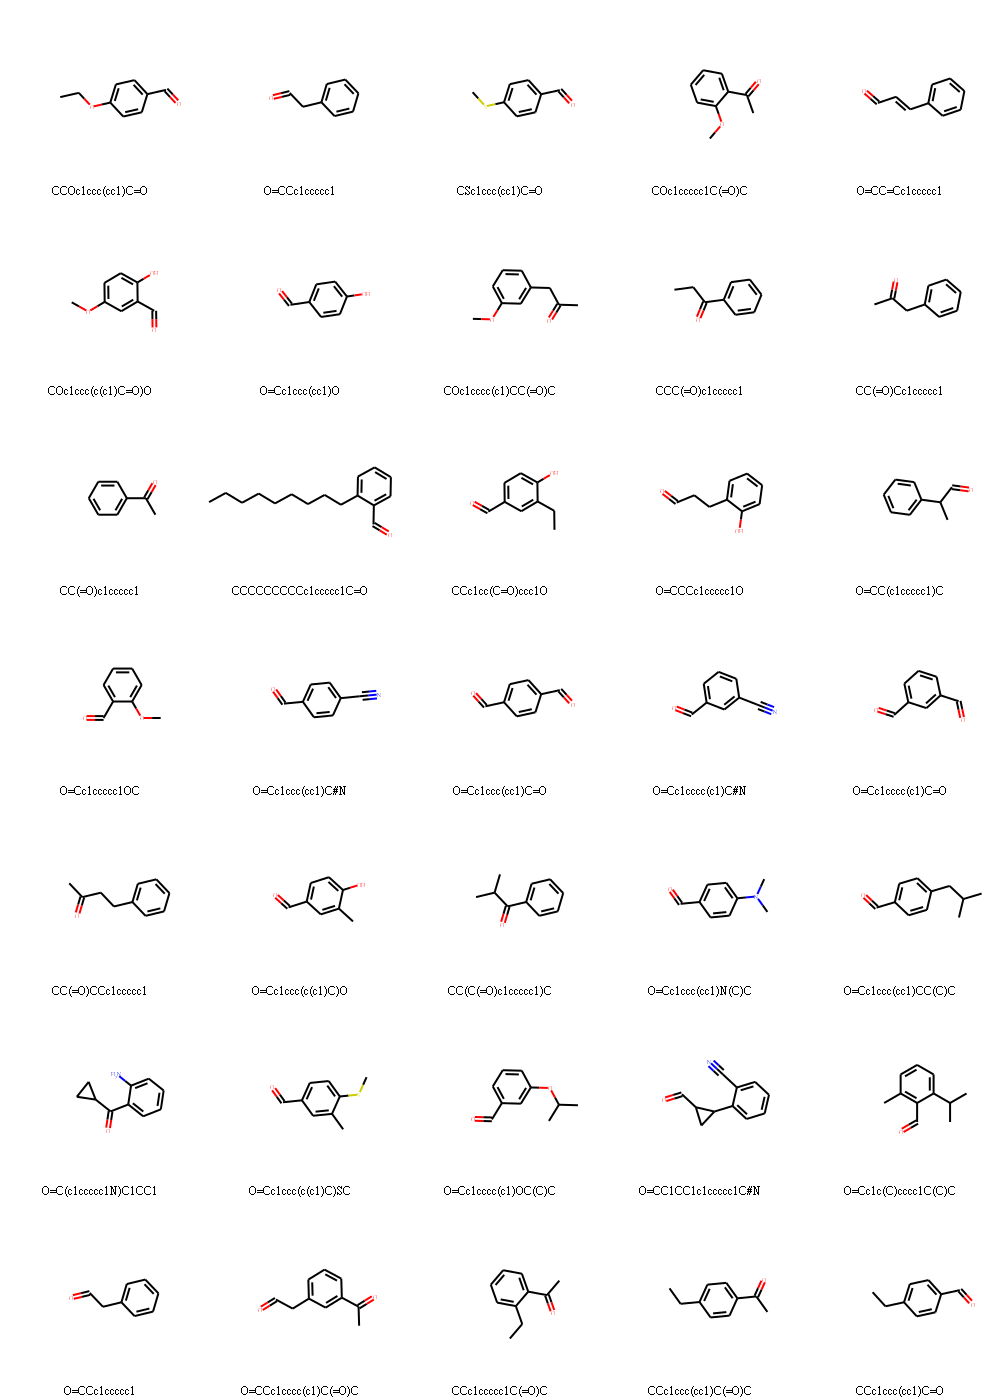

In [6]:
# Display the products smiles strings with their molecule structures
display(PandasTools.FrameToGridImage(r_structure_df,column='mol', legendsCol='smiles',molsPerRow=5))


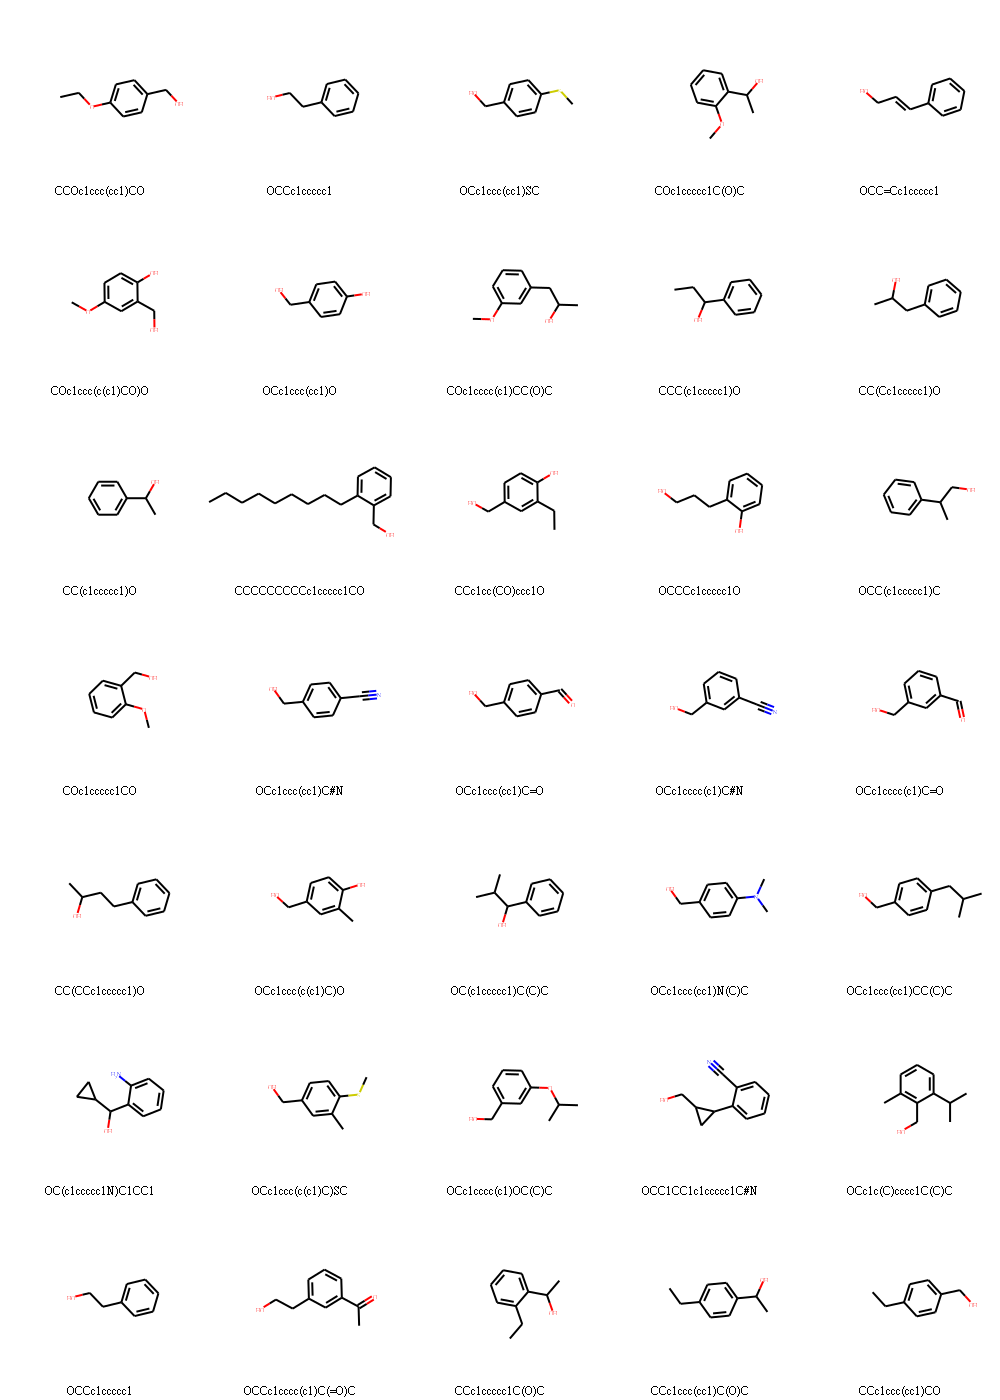

In [7]:
display(PandasTools.FrameToGridImage(p_structure_df,column='mol', legendsCol='smiles',molsPerRow=5))